# Python Basics 11: Basic Plots

The objective is to learn the basics of Python plotting.

We plot using the [matplotlib](https://matplotlib.org/) Python library.
Again, this is a *huge* topic and we cannot cover everything here.
In general, if you know the type of plot that you want to do a simple Google search of the type "X matplotlib" will probably send you to an example that you can adjust to your needs.

Here is how to import `matplotlib`:

In [1]:
# Both lines are necessary in a Jupyter notebook
import matplotlib.pyplot as plt
# This line tells the Jupyter notebook that the plots should just appear
# within it
%matplotlib inline

## Plotting simple functions

Let's start by plotting simple 1D functions.
We are going to plot this function:
$$
f(x) = \frac{\sin(x)}{x},
$$
for $x$ between $-10$ and $10$.
Here you go:

In [2]:
# We are going to need numpy as well
import numpy as np
# First you generate the data that you want to plot
# Here is a dense set of x's:
xs = np.linspace(-10, 10, 50)
# linspace gives you 200 equidistant points between -10 and 10
# you should remember this function:
print(xs)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


In [3]:
# Now evalute the function values at each one of these points
ys = np.sin(xs) / xs
print(ys)

[-0.05440211 -0.01733587  0.02599998  0.06889666  0.10410668  0.1249464
  0.12640109  0.10606798  0.06478742  0.00684921 -0.06028339 -0.12672351
 -0.18130811 -0.21300698 -0.21241429 -0.17312417 -0.09279917  0.02622535
  0.17690116  0.34801939  0.52530521  0.69293215  0.83527514  0.93868653
  0.99307289  0.99307289  0.93868653  0.83527514  0.69293215  0.52530521
  0.34801939  0.17690116  0.02622535 -0.09279917 -0.17312417 -0.21241429
 -0.21300698 -0.18130811 -0.12672351 -0.06028339  0.00684921  0.06478742
  0.10606798  0.12640109  0.1249464   0.10410668  0.06889666  0.02599998
 -0.01733587 -0.05440211]


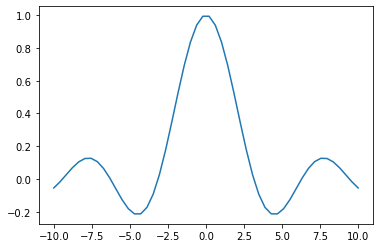

In [4]:
# And now we can plot. The simplet way to do it is this:
plt.plot(xs, ys);

However, I typically use the following more extensive version because it allows me to specify certain details like the size or the quality of the plot:

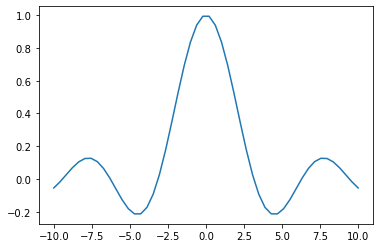

In [5]:
fig, ax = plt.subplots()
ax.plot(xs, ys);

Let's now add some more details in the plot.
Let's add x and y labels, and a title.

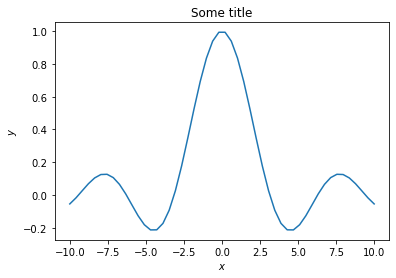

In [6]:
fig, ax = plt.subplots()
ax.plot(xs, ys)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Some title');

You can increase the quality of the plot like this:

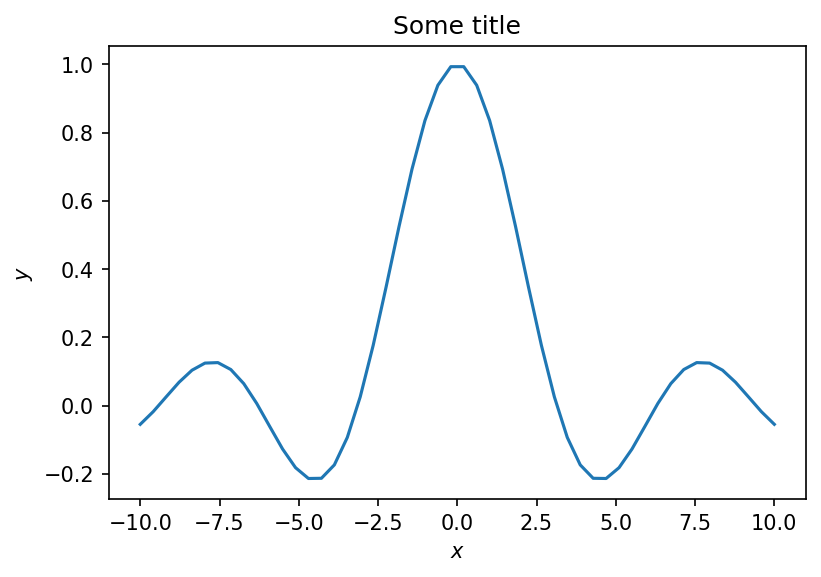

In [7]:
fig, ax = plt.subplots(dpi=150)
ax.plot(xs, ys)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Some title');

Let's now add one more function to the plot.
I will add this:
$$
g(x) = \frac{\sin^2(x)}{x}.
$$

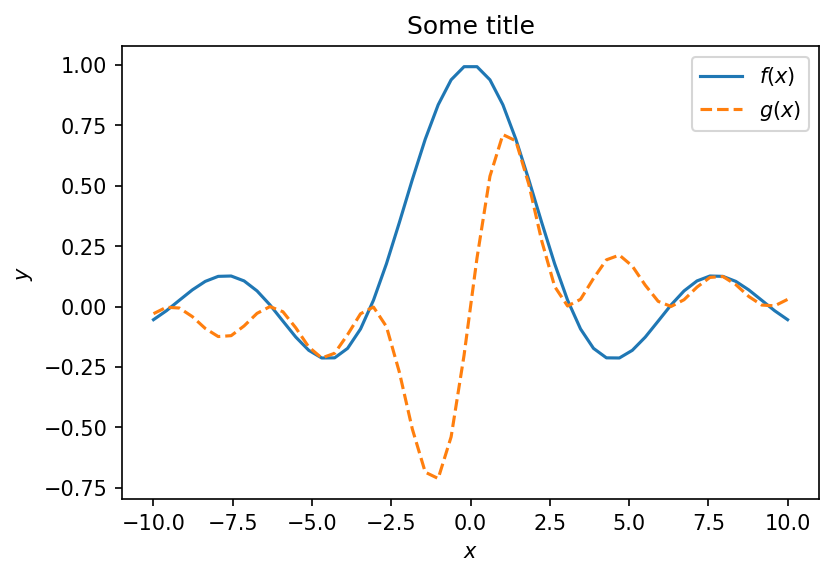

In [8]:
fig, ax = plt.subplots(dpi=150)
ax.plot(xs, ys, label='$f(x)$')
ax.plot(xs, np.sin(xs) ** 2 / xs, '--', label='$g(x)$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Some title')
plt.legend(loc='best')

Notice that the colors are automatically different for the two curves.
However, you have to specify a different style.
You can also change the colors:

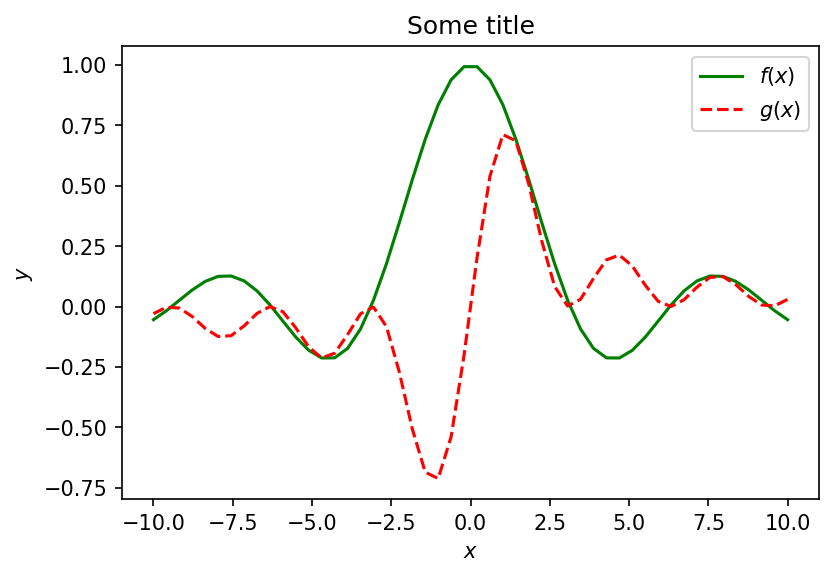

In [9]:
fig, ax = plt.subplots(dpi=150)
ax.plot(xs, ys, 'g', label='$f(x)$')
ax.plot(xs, np.sin(xs) ** 2 / xs, 'r--', label='$g(x)$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Some title')
plt.legend(loc='best')

You don't have to memorize the details of the style right now. A simple Google search can reveal the info you need and you will eventually start to remember the details.

Finally, let me also throw some noisy data into the mix:

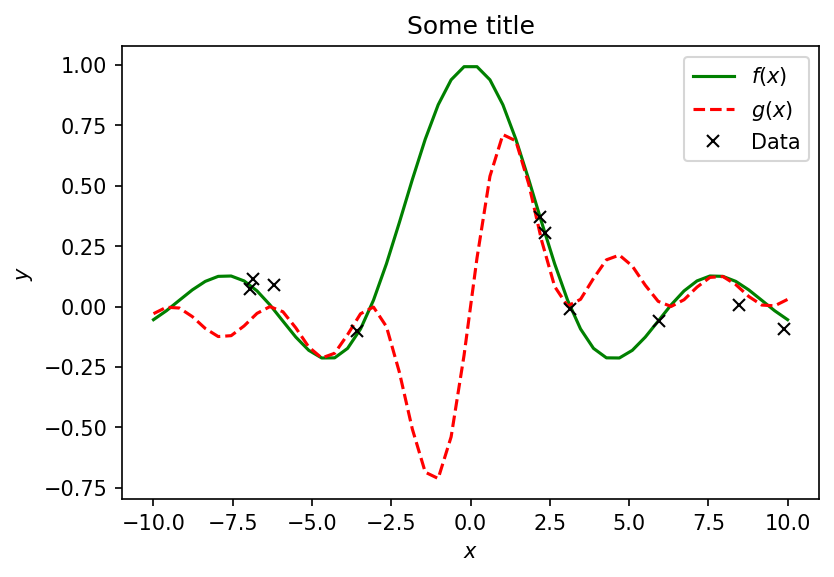

In [10]:
# This gives you ten random numbers between -10 an 10
X = 20.0 * np.random.rand(10) - 10.0
# Let's use the first function to generate the noisy y's
Y = np.sin(X) / X + 0.1 * np.random.randn(10)
# The last part added a bit of noise 
fig, ax = plt.subplots(dpi=150)
ax.plot(xs, ys, 'g', label='$f(x)$')
ax.plot(xs, np.sin(xs) ** 2 / xs, 'r--', label='$g(x)$')
ax.plot(X, Y, 'xk', label='Data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Some title')
plt.legend(loc='best')

## Questions

+ Write code that plots this function:
$$
f(t) = e^{-0.5t}\sin(2\pi t),
$$
for $t$ between $0$ and $5$.

## Scatter plots

Let's load the data from the previous hands-on activity:

In [11]:
# Make sure you run this on Google Colab
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)
   
# The url of the file we want to download
#url = 'YOUR_URL/temp_price.csv'
#download(url) #not needed -- data is local

In [12]:
import pandas as pd
# Reads a csv file into the pandas framework
temp_price = pd.read_csv('temp_price.csv')
temp_price.head()

,household,date,score,t_out,t_unit,hvac,price,Price per week,Price per day
0,a1,2019-01-06,85,38.599231,71.580704,35.113758,0.17303,6.075734,0.867962
1,a10,2019-01-06,70,38.599231,73.286260,63.949057,0.17303,11.065105,1.580729
2,a11,2019-01-06,61,38.599231,74.252046,147.612108,0.17303,25.541323,3.648760
3,a12,2019-01-06,65,38.599231,73.708482,74.394518,0.17303,12.872483,1.838926
4,a13,2019-01-06,66,38.599231,73.549554,173.095836,0.17303,29.950772,4.278682


We are going to clean them up as we did before:

In [ ]:
clean_data = temp_price.dropna(axis=0).rename(columns={'Price per week': 'week_price',
                                                       'Price per day': 'daily_price'})
clean_data.head()

Let's try and visualze the data to gain some insight about them. In this section we will look at scatter plots and histograms. If you want to look at the documentation, then click on the links.
+ [Scatter Plots](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html?highlight=scatter): documentation tells how to build a scatter plot in pandas
+ [Histograms](https://pandas.pydata.org/docs/reference/api/pandas.Series.hist.html?highlight=hist#pandas.Series.hist): documentation tells how build a histogram in pandas

In [ ]:
# Building a scatter plot
fig, ax = plt.subplots()
ax.scatter(clean_data['t_unit'], clean_data['hvac'])
ax.set_xlabel('Unit Temperature (F)')
ax.set_ylabel('HVAC energy consumed (kWh)');

We observe that higher unit temperature in general leads to higher HVAC energy consumption.
However, the relation is not linear.
This is because the appartments in this building have different physical characteristics.
For example, an appartment that is at the corner of the the building has more of each external surfaces to the environment and thus it needs more energy to maintain a given temperature than an appartment that is, say, in the middle of the building.

And here is a histogram of the unit temperature:

In [ ]:
# Building a histogram
fig, ax = plt.subplots()
ax.hist(clean_data['t_unit'], bins=10, color='orange')
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Number of Apartments')
ax.set_title('Temperature Frequency in Apartments');

### Questions

Using the energy data do the following
+ Build a scatter plot of price (x-axis) vs score and another plot of the price (x-axis) vs. HVAC consumed

+ Build histograms of the score and another histogram of the HVAC consumption of the apartments

For each plot include x and y labels, titles and specify the number of bins you choose. 

Once you are done plotting, write down your observations about each in a markdown cell. 

In [ ]:
# Your code here

Your comments in cells like this